# k-means를 이용한 소비패턴분석

### 201502119 정지원

### 데이터 셋 소개

[Mall Customer Segmentation Data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)


In [79]:
import numpy as np
import pandas as pd
import copy
import random
from collections import OrderedDict

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [80]:
def read_data():
    data = pd.read_csv('Mall_Customers.csv')
    data = data[['Spending Score (1-100)', 'Annual Income (k$)']]

    return data.to_numpy()
data = read_data()
data

array([[ 39,  15],
       [ 81,  15],
       [  6,  16],
       [ 77,  16],
       [ 40,  17],
       [ 76,  17],
       [  6,  18],
       [ 94,  18],
       [  3,  19],
       [ 72,  19],
       [ 14,  19],
       [ 99,  19],
       [ 15,  20],
       [ 77,  20],
       [ 13,  20],
       [ 79,  20],
       [ 35,  21],
       [ 66,  21],
       [ 29,  23],
       [ 98,  23],
       [ 35,  24],
       [ 73,  24],
       [  5,  25],
       [ 73,  25],
       [ 14,  28],
       [ 82,  28],
       [ 32,  28],
       [ 61,  28],
       [ 31,  29],
       [ 87,  29],
       [  4,  30],
       [ 73,  30],
       [  4,  33],
       [ 92,  33],
       [ 14,  33],
       [ 81,  33],
       [ 17,  34],
       [ 73,  34],
       [ 26,  37],
       [ 75,  37],
       [ 35,  38],
       [ 92,  38],
       [ 36,  39],
       [ 61,  39],
       [ 28,  39],
       [ 65,  39],
       [ 55,  40],
       [ 47,  40],
       [ 42,  40],
       [ 42,  40],
       [ 52,  42],
       [ 60,  42],
       [ 54,

In [81]:
# 정규화
def norm(data):
    scaler = MinMaxScaler()
    return scaler.fit_transform(data)
data = norm(data)
data

array([[0.3877551 , 0.        ],
       [0.81632653, 0.        ],
       [0.05102041, 0.00819672],
       [0.7755102 , 0.00819672],
       [0.39795918, 0.01639344],
       [0.76530612, 0.01639344],
       [0.05102041, 0.02459016],
       [0.94897959, 0.02459016],
       [0.02040816, 0.03278689],
       [0.7244898 , 0.03278689],
       [0.13265306, 0.03278689],
       [1.        , 0.03278689],
       [0.14285714, 0.04098361],
       [0.7755102 , 0.04098361],
       [0.12244898, 0.04098361],
       [0.79591837, 0.04098361],
       [0.34693878, 0.04918033],
       [0.66326531, 0.04918033],
       [0.28571429, 0.06557377],
       [0.98979592, 0.06557377],
       [0.34693878, 0.07377049],
       [0.73469388, 0.07377049],
       [0.04081633, 0.08196721],
       [0.73469388, 0.08196721],
       [0.13265306, 0.10655738],
       [0.82653061, 0.10655738],
       [0.31632653, 0.10655738],
       [0.6122449 , 0.10655738],
       [0.30612245, 0.1147541 ],
       [0.87755102, 0.1147541 ],
       [0.

In [82]:
# 유클리디안 거리
def get_euclidean(data, centers):
    result = np.zeros(shape=len(centers))
    for i, x in enumerate(centers):
        result[i] = np.sqrt(sum(np.square(x - data)))

    return result

In [83]:
def draw_graph(data, labels, tick_labels = []):
    plt.figure()
    plt.xlabel(tick_labels[0])
    plt.ylabel(tick_labels[1])
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='rainbow')
    plt.show()

In [84]:
class KMeans:
    def __init__(self, data, n):
        self.data = data
        self.n = n
        self.cluster = OrderedDict()

    def init_center(self):
        index = random.randint(0, self.n)
        index_list = []
        for i in range(self.n):
            while index in index_list:
                index = random.randint(0, self.n)
            index_list.append(index)
            self.cluster[i] = {'center': self.data[index], 'data': []}

    def clustering(self, cluster):
        center_list = [0 for i in range(len(cluster))]
        for key, value in cluster.items():
            center_list[key] = value['center']
            cluster[key]['data'] = []
        for item in self.data:
            distance = get_euclidean(item, center_list)
            cluster[distance.argmin()]['data'].append(item)

        return cluster

    def update_center(self):
        cluster = copy.deepcopy(self.cluster)
        for key, value in self.cluster.items():
            x, y = 0.0, 0.0
            for item in value['data']:
                x += item[0]
                y += item[1]
            try:
                x /= len(value['data'])
            except ZeroDivisionError:
                pass
            try:
                y /= len(value['data'])
            except ZeroDivisionError:
                pass
            cluster[key]['center'] = np.array([x, y])

        return cluster

    def update(self):
        check = True
        while check:
            check = False
            cluster = self.clustering(self.update_center())
            for prev, next in zip(self.cluster.values(), cluster.values()):
                if not np.array_equal(prev['center'], next['center']):
                    check = True
                    self.cluster = cluster
                    # result, labels = self.get_result(self.cluster)
                    # draw_graph(result, labels)
                    break

    def fit(self):
        self.init_center()
        self.cluster = self.clustering(self.cluster)
        self.update()

        result, labels = self.get_result(self.cluster)
        tick_labels = ['Spending Score', 'Annual Income (k$)']
        draw_graph(result, labels, tick_labels)

    def get_result(self, cluster):
        result = []
        labels = []
        for key, value in cluster.items():
            for item in value['data']:
                labels.append(key)
                result.append(item)

        return np.array(result), labels


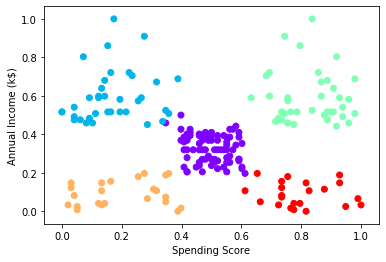

In [94]:
model = KMeans(data, 5)
model.fit()

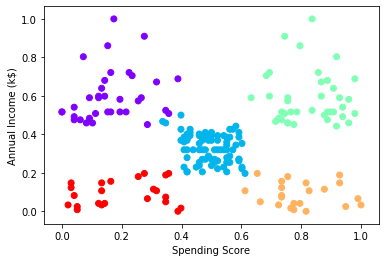

In [91]:
# k-means++
from sklearn.cluster import KMeans as KMeans_plus

model = KMeans_plus(init="k-means++", n_clusters=5, random_state=0).fit(data)
tick_labels = ['Spending Score', 'Annual Income (k$)']

draw_graph(data, model.labels_, tick_labels)